In [14]:
from start_plot import *
import numpy as np
import matplotlib.pyplot as plt
A13=np.genfromtxt('A13_results_wFeH.txt',dtype=None, names=True)
gass=np.genfromtxt('Crane2003/Crane2003-StarInfo.txt',dtype=None, names=True)
gass = gass[gass['b']>20]
TA1 = np.genfromtxt('TA1_CaT.txt', dtype=None, names=True)
TA2 = np.genfromtxt('TA2_CaT.txt', dtype=None, names=True)
ta_vel = np.genfromtxt('TA_vel.txt', dtype=None, names=True)
%matplotlib inline


In [15]:
usol=11.1
vsol=12.24
wsol=7.25
theta=236.0
theta=220
vcirc=vsol+theta

v_gsr_a13=A13['v_helio_final']+usol*np.cos(A13['b']*np.pi/180.)*np.cos(A13['l']*np.pi/180.)+vcirc*np.cos(A13['b']*np.pi/180.)*np.sin(A13['l']*np.pi/180.)+wsol*np.sin(A13['b']*np.pi/180)

v_gsr_gass=gass['v_hel']+usol*np.cos(gass['b']*np.pi/180.)*np.cos(gass['l']*np.pi/180.)+vcirc*np.cos(gass['b']*np.pi/180.)*np.sin(gass['l']*np.pi/180.)+wsol*np.sin(gass['b']*np.pi/180)

v_gsr_ta=ta_vel['vhel']+usol*np.cos(ta_vel['b']*np.pi/180.)*np.cos(ta_vel['l']*np.pi/180.)+vcirc*np.cos(ta_vel['b']*np.pi/180.)*np.sin(ta_vel['l']*np.pi/180.)+wsol*np.sin(ta_vel['b']*np.pi/180)

d_a13 = 10**((A13['Ks']-(3.8+1.3*A13['feh']-8.4*A13['JKs']))/5+1)/1000
d_gass = 10**((gass['Ks']-(3.8+1.3*(-0.45)-8.4*gass['JKs']))/5+1)/1000
d_ta1 = 10**((TA1['Ks']-(3.8+1.3*TA1['FeH']-8.4*TA1['JKs']))/5+1)/1000
d_ta2 = 10**((TA2['Ks']-(3.8+1.3*TA2['FeH']-8.4*TA2['JKs']))/5+1)/1000

ta2_l = []
ta2_b = []
for i in TA2['name']:
    ta2_l.append(ta_vel['l'][ta_vel['ID']==i][0])
    ta2_b.append(ta_vel['b'][ta_vel['ID']==i][0])
    
ta1_l = []
ta1_b = []    
for i in TA1['name']:
    ta1_l.append(ta_vel['l'][ta_vel['ID']==i][0])
    ta1_b.append(ta_vel['b'][ta_vel['ID']==i][0])

ta1_l = np.array(ta1_l)
ta1_b = np.array(ta1_b)
ta2_l = np.array(ta2_l)
ta2_b = np.array(ta2_b)



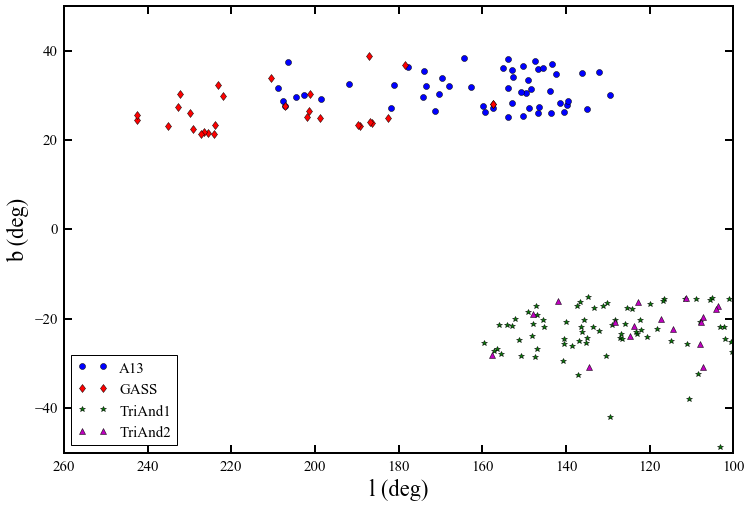

In [31]:
plt.figure(figsize=[12,8])
plt.plot(A13['l'], A13['b'],'ob', label = 'A13')
plt.plot(gass['l'], gass['b'],'dr', label = 'GASS')
ta1mask = ta_vel['group'] == 'TriAnd1'
ta2mask = ta_vel['group'] == 'TriAnd2'
plt.plot(ta_vel['l'][ta1mask],ta_vel['b'][ta1mask],'*g', label = 'TriAnd1')
plt.plot(ta_vel['l'][ta2mask],ta_vel['b'][ta2mask],'^m', label = 'TriAnd2')
plt.legend(loc=3)
plt.xlim(260, 100)
plt.ylim(-50,50)
plt.xlabel('l (deg)')
plt.ylabel('b (deg)')

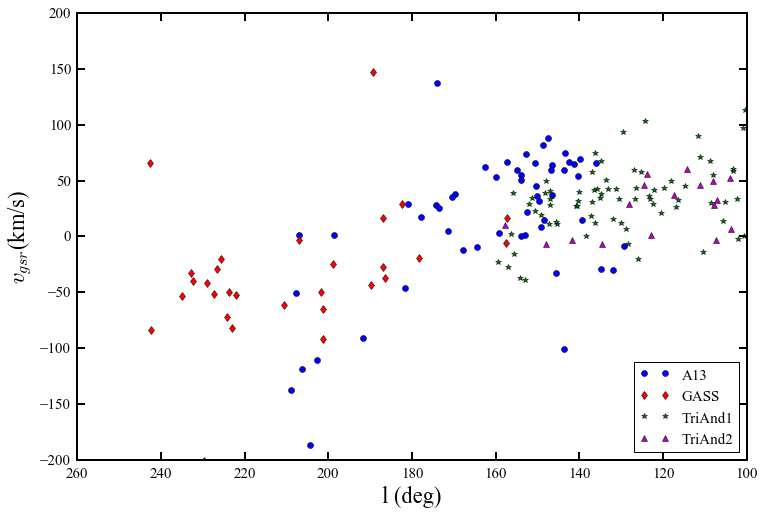

In [33]:
plt.figure(figsize=[12,8])
plt.plot(A13['l'], v_gsr_a13,'ob', label = 'A13')
plt.plot(gass['l'], v_gsr_gass,'dr', label = 'GASS')
ta1mask = ta_vel['group'] == 'TriAnd1'
ta2mask = ta_vel['group'] == 'TriAnd2'

plt.plot(ta_vel['l'][ta1mask],v_gsr_ta[ta1mask],'*g', label = 'TriAnd1')
plt.plot(ta_vel['l'][ta2mask],v_gsr_ta[ta2mask],'^m', label = 'TriAnd2')
plt.legend(loc=4)
plt.xlim(260, 100)
plt.ylim(-200,200)
plt.xlabel('l (deg)')
plt.ylabel('$v_{gsr}$(km/s)')

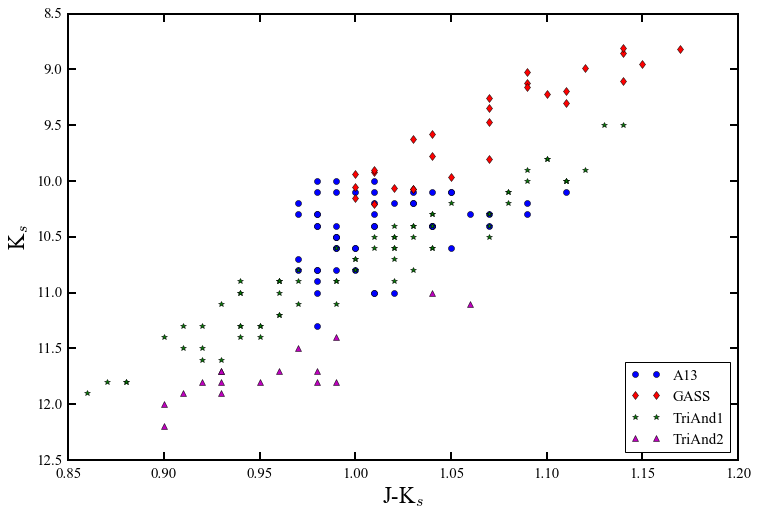

In [37]:
plt.figure(figsize=[12,8])
plt.plot(A13['JKs'],A13['Ks'],'bo',label = 'A13')
plt.plot(gass['JKs'],gass['Ks'], 'rd', label = 'GASS')
plt.plot(ta_vel['JKs'][ta1mask], ta_vel['Ks'][ta1mask], '*g', label = 'TriAnd1')
plt.plot(ta_vel['JKs'][ta2mask], ta_vel['Ks'][ta2mask], '^m', label = 'TriAnd2')
plt.ylim(12.5,8.5)
plt.legend(loc=4)
plt.xlabel('J-K$_s$')
plt.ylabel('K$_s$')

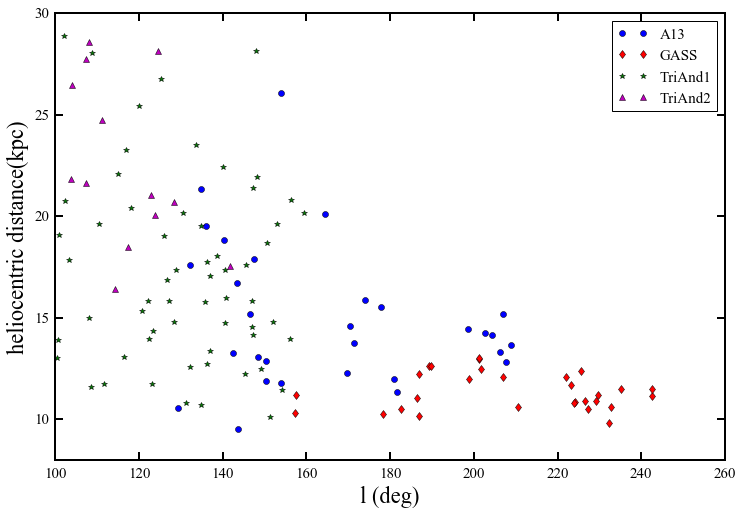

In [38]:
plt.figure(figsize=[12,8])
plt.plot(A13['l'],d_a13,'bo',label = 'A13')
plt.plot(gass['l'],d_gass, 'rd', label = 'GASS')
plt.plot(ta1_l, d_ta1, '*g', label = 'TriAnd1')
plt.plot(ta2_l, d_ta2, '^m', label = 'TriAnd2')
plt.ylim(8,30)
plt.legend(loc=1)
plt.xlabel('l (deg)')
plt.ylabel('heliocentric distance(kpc)')

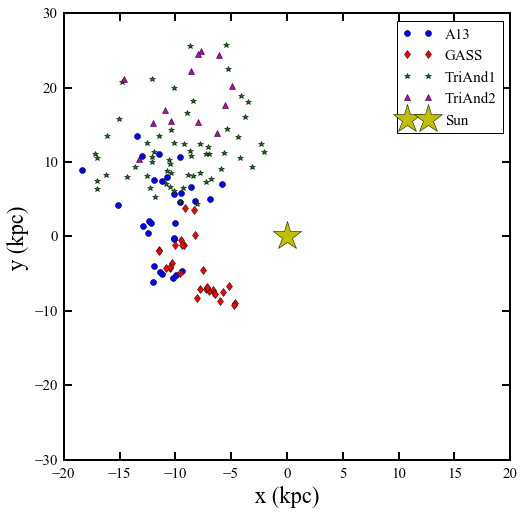

In [40]:
import bovy_coords

gassxyz=bovy_coords.lbd_to_XYZ(gass['l'],gass['b'],d_gass, degree = True)

a13xyz=bovy_coords.lbd_to_XYZ(A13['l'],A13['b'],d_a13, degree = True)
ta1xyz=bovy_coords.lbd_to_XYZ(ta1_l,ta1_b,d_ta1, degree = True)
ta2xyz=bovy_coords.lbd_to_XYZ(ta2_l,ta2_b,d_ta2, degree = True)
plt.figure(figsize=[8,8])
plt.plot(a13xyz[:,0],a13xyz[:,1],'bo')
plt.plot(gassxyz[:,0],gassxyz[:,1],'dr')
plt.plot(ta1xyz[:,0],ta1xyz[:,1],'*g')
plt.plot(ta2xyz[:,0],ta2xyz[:,1],'^m')

plt.plot(0,0,'*y',ms =30)
plt.legend(['A13','GASS','TriAnd1', 'TriAnd2','Sun'])

#print bovy_coords.XYZ_to_galcenrect(xyz[:,0],xyz[:,1],xyz[:,2],Xsun=8)

plt.ylim(-30,30)
plt.xlim(-20,20)
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')

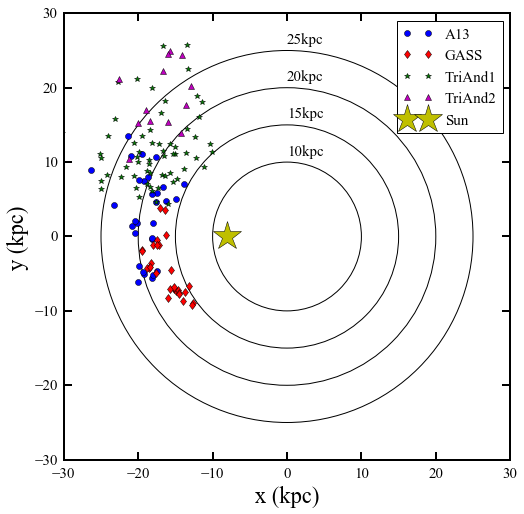

In [43]:
import bovy_coords

gassxyz=bovy_coords.lbd_to_XYZ(gass['l'],gass['b'],d_gass, degree = True)
a13xyz=bovy_coords.lbd_to_XYZ(A13['l'],A13['b'],d_a13, degree = True)
ta1xyz=bovy_coords.lbd_to_XYZ(ta1_l,ta1_b,d_ta1, degree = True)
ta2xyz=bovy_coords.lbd_to_XYZ(ta2_l,ta2_b,d_ta2, degree = True)
plt.figure(figsize=[8,8])
plt.plot(a13xyz[:,0]-8,a13xyz[:,1],'bo')
plt.plot(gassxyz[:,0]-8,gassxyz[:,1],'dr')
plt.plot(ta1xyz[:,0]-8,ta1xyz[:,1],'*g')
plt.plot(ta2xyz[:,0]-8,ta2xyz[:,1],'^m')


plt.plot(0-8,0,'*y',ms =30)
plt.legend(['A13','GASS','TriAnd1', 'TriAnd2','Sun'])

#print bovy_coords.XYZ_to_galcenrect(xyz[:,0],xyz[:,1],xyz[:,2],Xsun=8)
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.ylim(-30,30)
plt.xlim(-30,30)

circle1=plt.Circle((0,0),10,color='k',fill=False)
circle2=plt.Circle((0,0),15,color='k',fill=False)
circle3=plt.Circle((0,0),20,color='k',fill=False)
circle4=plt.Circle((0,0),25,color='k',fill=False)


fig = plt.gcf()
fig.gca().add_artist(circle1)
fig.gca().add_artist(circle2)
fig.gca().add_artist(circle3)
fig.gca().add_artist(circle4)

plt.text(0,11,'10kpc',fontsize=15)
plt.text(0,16,'15kpc',fontsize=15)
plt.text(0,21,'20kpc',fontsize=15)
plt.text(0,26,'25kpc',fontsize=15)

In [206]:
print gassxyz[0,0],gassxyz[0,1],gassxyz[0,2]
bovy_coords.XYZ_to_galcencyl(gassxyz[0,0],gassxyz[0,1],gassxyz[0,2],Xsun=8)

-8.36635288796 3.49406073051 4.85538991387


(16.735171562955976, 0.21033289940126604, 4.8553899138660288)

In [12]:
import matplotlib.pyplot as plt
circle1=plt.Circle((0,0),.2,color='r',fill=False)

fig = plt.gcf()
fig.gca().add_artist(circle1)


<module 'turtle' from '/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-tk/turtle.pyc'>

In [8]:
turtle.circle(10)